In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [5]:
datasets = [train, test]

In [6]:
sample = pd.read_csv('sample_submission.csv')
sample.head()

,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977


## data preprocessing

In [7]:
for df in datasets:
    print(df.duplicated().sum()) # no duplicated raws in train or test

0
0


In [8]:
train.shape

(1460, 81)

In [9]:
# from data description NA values is meaningfull
for df in datasets:
    df['Alley'].fillna('No_alley_access',inplace=True)
    df['BsmtFinType2'].fillna('No_Basement',inplace=True)
    df['BsmtFinType1'].fillna('No_Basement',inplace=True)    
    df['BsmtExposure'].fillna('No_Basement',inplace=True)    
    df['BsmtCond'].fillna('No_Basement',inplace=True)    
    df['BsmtQual'].fillna('No_Basement',inplace=True) 
    df['FireplaceQu'].fillna('No_Fireplace',inplace=True)
    df['GarageCond'].fillna('No_Garage',inplace=True)
    df['GarageQual'].fillna('No_Garage',inplace=True)    
    df['GarageFinish'].fillna('No_Garage',inplace=True)    
    df['GarageType'].fillna('No_Garage',inplace=True)    
    df['PoolQC'].fillna('No_Pool',inplace=True)    
    df['Fence'].fillna('No_Fence',inplace=True)     

In [10]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,No_alley_access,Reg,Lvl,AllPub,...,0,No_Pool,No_Fence,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,No_alley_access,Reg,Lvl,AllPub,...,0,No_Pool,No_Fence,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,No_alley_access,IR1,Lvl,AllPub,...,0,No_Pool,No_Fence,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,No_alley_access,IR1,Lvl,AllPub,...,0,No_Pool,No_Fence,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,No_alley_access,IR1,Lvl,AllPub,...,0,No_Pool,No_Fence,NaN,0,12,2008,WD,Normal,250000


In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          1460 non-null   object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [12]:
for df in datasets:
    df.drop('MiscFeature',axis=1,inplace=True)

In [13]:
for df in datasets:
    dtypes =  df.dtypes.to_dict()
    for col in df.columns:
        if dtypes[col] == 'O':
            print(f"{col} : {df[col].unique()} ")
    print('='*30)

MSZoning : ['RL' 'RM' 'C (all)' 'FV' 'RH'] 
Street : ['Pave' 'Grvl'] 
Alley : ['No_alley_access' 'Grvl' 'Pave'] 
LotShape : ['Reg' 'IR1' 'IR2' 'IR3'] 
LandContour : ['Lvl' 'Bnk' 'Low' 'HLS'] 
Utilities : ['AllPub' 'NoSeWa'] 
LotConfig : ['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3'] 
LandSlope : ['Gtl' 'Mod' 'Sev'] 
Neighborhood : ['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste'] 
Condition1 : ['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe'] 
Condition2 : ['Norm' 'Artery' 'RRNn' 'Feedr' 'PosN' 'PosA' 'RRAn' 'RRAe'] 
BldgType : ['1Fam' '2fmCon' 'Duplex' 'TwnhsE' 'Twnhs'] 
HouseStyle : ['2Story' '1Story' '1.5Fin' '1.5Unf' 'SFoyer' 'SLvl' '2.5Unf' '2.5Fin'] 
RoofStyle : ['Gable' 'Hip' 'Gambrel' 'Mansard' 'Flat' 'Shed'] 
RoofMatl : ['CompShg' 'WdShngl' 'Metal' 'WdShake' 'Membran' 'Ta

In [14]:
null_index =  list(train[train['MasVnrType'].isnull()].index)
null_index

[234, 529, 650, 936, 973, 977, 1243, 1278]

In [15]:
train.drop(index=null_index,axis=0,inplace=True)

In [16]:
null_index =  list(train[train['Electrical'].isnull()].index)
null_index

[1379]

In [17]:
train.drop(index=null_index,axis=0,inplace=True)

In [18]:
'''
i will concat train and test dataFrames to make sure that columns will be identical after encoding
and to fillna in numerical columns with mean in the entire data
'''
target = 'SalePrice' # dtype = int64
target_values = train[target]
train.drop(columns=[target], inplace=True)
train[target] = target_values
train[target] = train[target].astype(str)
test[target] = np.repeat("test_dataset", test.shape[0])
df = pd.concat([train, test])

In [20]:
df.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1454,2915,160,RM,21.0,1936,Pave,No_alley_access,Reg,Lvl,AllPub,...,0,0,No_Pool,No_Fence,0,6,2006,WD,Normal,test_dataset
1455,2916,160,RM,21.0,1894,Pave,No_alley_access,Reg,Lvl,AllPub,...,0,0,No_Pool,No_Fence,0,4,2006,WD,Abnorml,test_dataset
1456,2917,20,RL,160.0,20000,Pave,No_alley_access,Reg,Lvl,AllPub,...,0,0,No_Pool,No_Fence,0,9,2006,WD,Abnorml,test_dataset
1457,2918,85,RL,62.0,10441,Pave,No_alley_access,Reg,Lvl,AllPub,...,0,0,No_Pool,MnPrv,700,7,2006,WD,Normal,test_dataset
1458,2919,60,RL,74.0,9627,Pave,No_alley_access,Reg,Lvl,AllPub,...,0,0,No_Pool,No_Fence,0,11,2006,WD,Normal,test_dataset


In [31]:
null_df = df.isnull().mean().to_frame()
null_df["column"] = null_df.index
null_df.index = np.arange(null_df.shape[0])
null_df[null_df[0] >0.001]

,0,column
2,0.001375,MSZoning
3,0.166323,LotFrontage
25,0.005498,MasVnrType
26,0.005155,MasVnrArea
59,0.054639,GarageYrBlt


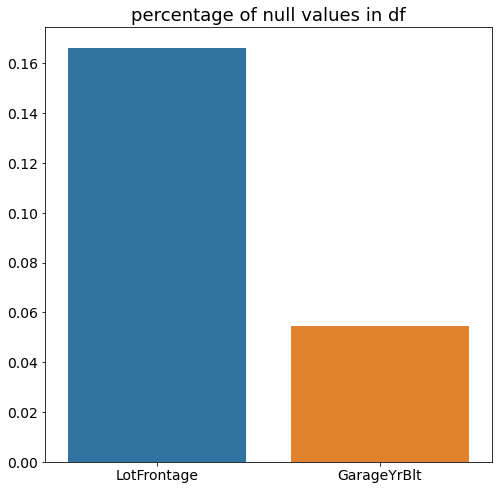

In [32]:
null_df['null_perc'] = null_df.iloc[:,0]
null_df = null_df.iloc[:,1:]
x = list(null_df[null_df.null_perc > 0.01]['column'])
y = list(null_df[null_df.null_perc > 0.01]['null_perc'])
plt.figure(figsize=(8,8))
sns.barplot(x=x,y=y);
plt.title('percentage of null values in df',fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

In [36]:
df.groupby('Street')['LotFrontage'].mean()

Street
Grvl    88.200000
Pave    69.214404
Name: LotFrontage, dtype: float64

In [37]:
df.loc[(df["LotFrontage"].isnull()) & (df["Street"]=='Grvl'), 'LotFrontage'] = 88.2
df.loc[(df["LotFrontage"].isnull()) & (df["Street"]=='Pave'), 'LotFrontage'] = 69.2144

In [39]:
df[(df.GarageYrBlt.isnull()) & (df['GarageType'] != 'No_Garage')]['GarageType']

666     Detchd
1116    Detchd
Name: GarageType, dtype: object

In [40]:
df.groupby('GarageType')['GarageYrBlt'].mean()

GarageType
2Types       1964.695652
Attchd       1984.279720
Basment      1963.138889
BuiltIn      1997.054348
CarPort      1958.066667
Detchd       1961.213642
No_Garage            NaN
Name: GarageYrBlt, dtype: float64

In [41]:
# detchd garage type built in 1961, should check if the house built before 1961 or not!
df[(df.GarageYrBlt.isnull()) & (df['GarageType'] != 'No_Garage')]['YearBuilt']

666     1910
1116    1923
Name: YearBuilt, dtype: int64

In [42]:
# now we can assume null values in detchd garage built in 1961 
df.loc[(df["GarageYrBlt"].isnull()) & (df["GarageType"]=='Detchd'), 'GarageYrBlt'] = 1961
df.loc[(df["GarageYrBlt"].isnull()) & (df["GarageType"]=='No_Garage'), 'GarageYrBlt'] = 0

In [43]:
numercal_columns = []
categorical_columns = []
dtypes =  df.dtypes.to_dict()
for col in df.columns:
    if dtypes[col] == 'O':
        categorical_columns.append(col)
    else:
        numercal_columns.append(col)

In [46]:
categorical_columns.remove(target)

In [48]:
for column in numercal_columns:
    df[column].fillna(value=df[column].mean(), inplace=True)

In [49]:
get_dummies_cols = []
encoder_cols = []
for col in categorical_columns:
    if 3 <= df[col].nunique() <= 7:
        get_dummies_cols.append(col)
    else:
        encoder_cols.append(col)

In [50]:
df[categorical_columns] = df[categorical_columns].fillna("unknown")

In [51]:
from sklearn import preprocessing
encoder = preprocessing.LabelEncoder()
for col in encoder_cols:
    df[col] = encoder.fit_transform(
        df[col]
    )
for col in get_dummies_cols:
    df = pd.concat([df, pd.get_dummies(df[col], prefix=col)], axis=1)
    df = df.drop([col], axis=1)

In [52]:
df.head()

,Id,MSSubClass,LotFrontage,LotArea,Street,Utilities,Neighborhood,Condition1,Condition2,HouseStyle,...,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_No_Fence,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.0,8450,1,0,5,2,2,5,...,0,0,0,1,0,0,0,0,1,0
1,2,20,80.0,9600,1,0,24,1,2,2,...,0,0,0,1,0,0,0,0,1,0
2,3,60,68.0,11250,1,0,5,2,2,5,...,0,0,0,1,0,0,0,0,1,0
3,4,70,60.0,9550,1,0,6,2,2,5,...,0,0,0,1,1,0,0,0,0,0
4,5,60,84.0,14260,1,0,15,2,2,5,...,0,0,0,1,0,0,0,0,1,0


In [56]:
train_n = df[df[target] != "test_dataset"]
test_n = df[df[target] == "test_dataset"].drop(target, axis=1)
train_n[target] = train_n[target].astype(int)

C:\Users\Ahmed said\AppData\Local\Temp\ipykernel_19936\3184096702.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_n[target] = train_n[target].astype(int)


In [61]:
train_n.shape

(1451, 210)

In [62]:
x_train = train_n.iloc[:1200,:].drop(target,axis=1)
y_train = train_n.iloc[:1200,:][target]
x_test =  train_n.iloc[1200:,:].drop(target,axis=1)
y_test =  train_n.iloc[1200:,:][target]

In [63]:
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor

In [75]:
model=XGBRegressor(max_depth=3, learning_rate=0.24 , n_estimators=2000, objective='reg:linear', booster='gbtree')
XGB=model.fit(train_n.drop(['Id',target],axis=1),train_n[target])
prediction=XGB.predict(test_n.drop(['Id',target],axis=1))

[16:52:03] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.


In [76]:
model.score(train_n.drop(['Id',target],axis=1),train_n[target])

0.9999963459829707

In [77]:
test_n[target] = prediction

In [78]:
test_n[['Id',target]].to_csv('submission2.csv',index=False)

In [80]:
from sklearn.neural_network import MLPRegressor
mlp = MLPRegressor(random_state=1, max_iter=500)
mlp.fit(train_n.drop(['Id',target],axis=1),train_n[target])
pred = mlp.predict(test_n.drop(['Id',target],axis=1))

C:\Users\Ahmed said\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


In [82]:
test_n[target] = pred

In [83]:
test_n[['Id',target]].to_csv('submission3.csv',index=False)